In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import datetime

In [3]:
df = pd.read_json("/home/zeng/INFLUENZA_DATABASE/H3N2/data/isolation_information.json", orient='index')
df = df.replace('', np.nan)

In [4]:
df['region'] = df['location'].str.split(' / ').str.get(0)
df['country'] = df['location'].str.split(' / ').str.get(1)
df.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357698,EPI1447700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-01,NaN,Asia / Malaysia,A/Malaysia/1016/2003,Asia,Malaysia
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_357648,EPI1447603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002-12-01,NaN,Oceania / Australia / Tasmania,A/Victoria/101/2003,Oceania,Australia
EPI_ISL_357641,EPI1447592,NaN,EPI1447591,NaN,NaN,NaN,NaN,NaN,2003-08-26,NaN,Oceania / Australia,A/Tasmania/1/2003,Oceania,Australia
EPI_ISL_357613,EPI1447537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-01-21,NaN,Asia / Singapore,A/Singapore/31/2003,Asia,Singapore


In [5]:
# 按条件修改列值
df.loc[df.region == '/ Taiwan', 'country'] = 'Taiwan'
df.loc[df.region == '/ Taiwan', 'region'] = 'Asia'

df.loc[df.region == '/ SPAIN', 'country'] = 'Spain'
df.loc[df.region == '/ SPAIN', 'region'] = 'Europe'

df.loc[df.region == '/ Laos', 'country'] = 'Laos'
df.loc[df.region == '/ Laos', 'region'] = 'Asia'

In [6]:
df['region'].value_counts()

North America    33852
Europe           25763
Asia             23210
Oceania           7748
South America     4398
Africa            2824
Name: region, dtype: int64

In [7]:
df.country.value_counts()

United States                       25170
Canada                               6937
Australia                            6249
China                                5663
Switzerland                          5593
Japan                                4756
Spain                                3339
United Kingdom                       2601
France                               2144
Brazil                               1674
Russian Federation                   1417
Singapore                            1412
Hong Kong (SAR)                      1411
Taiwan                               1223
Germany                              1178
Netherlands                          1177
New Zealand                          1152
Sweden                               1042
India                                 982
Korea_ Republic of                    959
Thailand                              941
Italy                                 885
Austria                               818
Chile                             

In [8]:
df.groupby('region').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,country
region,,,,,,,,,,,,,
Africa,2790,1492,2439,1097,1083,1081,1064,1059,2824,0,2824,2824,2824
Asia,21106,9760,14721,5550,5573,5628,5476,5364,23210,0,23210,23210,23207
Europe,20447,7259,14299,6216,6183,5926,5691,5815,25763,0,25763,25763,25756
North America,33590,23088,23975,20951,20779,19948,20469,20512,33852,2,33852,33852,33850
Oceania,7681,6261,6885,2674,2636,2655,2643,2643,7748,0,7748,7748,7748
South America,4283,2388,3021,2177,2151,2137,2147,2153,4398,0,4398,4398,4397


In [9]:
df.groupby('country').count()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region
country,,,,,,,,,,,,,
Afghanistan,78,72,72,71,70,70,70,69,78,0,78,78,78
Albania,49,18,48,16,16,16,16,15,49,0,49,49,49
Algeria,34,2,32,0,0,0,0,0,34,0,34,34,34
American Samoa,13,9,13,2,2,2,2,2,13,0,13,13,13
Anguilla,3,3,3,0,0,0,0,0,3,0,3,3,3
Argentina,573,263,367,230,229,225,224,224,577,0,577,577,577
Armenia,64,0,64,0,0,0,0,0,64,0,64,64,64
Aruba,12,11,12,0,0,0,0,0,12,0,12,12,12
Australia,6191,5083,5608,1994,1959,1979,1971,1971,6249,0,6249,6249,6249


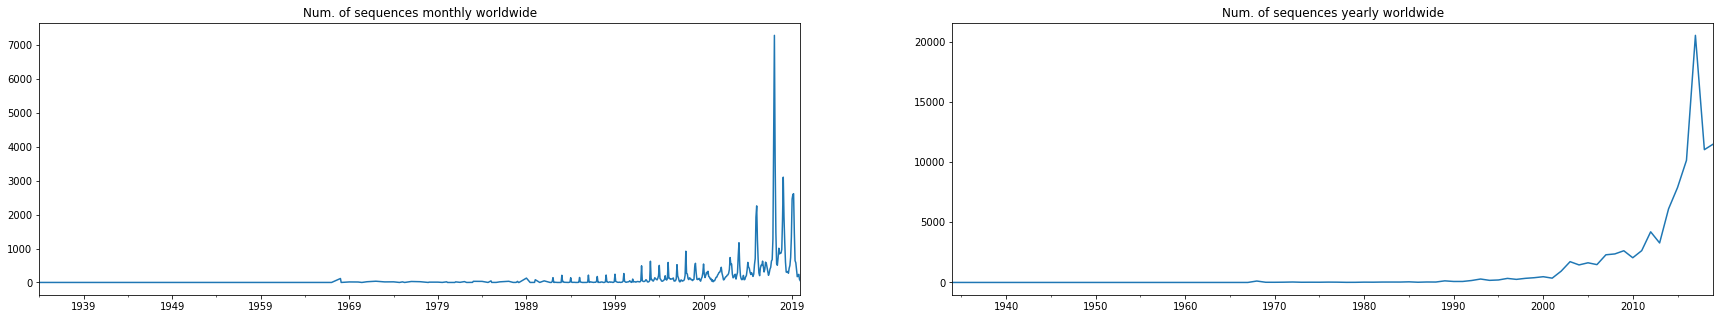

In [10]:
time_index_by_month = pd.to_datetime(df.date.values).to_period('M')
time_index_by_year = pd.to_datetime(df.date.values).to_period('Y')

fig, axes = plt.subplots(1, 2, figsize=(30, 5))
df.groupby(time_index_by_month).size().plot(ax=axes[0], title="Num. of sequences monthly worldwide")
df.groupby(time_index_by_year).size().plot(ax=axes[1], title="Num. of sequences yearly worldwide")

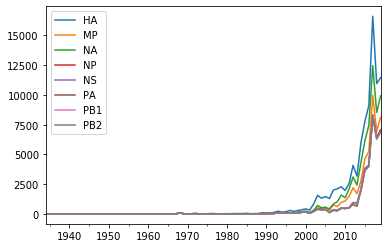

In [11]:
df.iloc[:,0:8].groupby(time_index_by_year).count().plot()

In [12]:
def f(x):
    count = 0
    for i in x:
        if i == np.nan:
            count += 1
    return count

df_with_genome = df[df.iloc[:, 0:8].count(axis='columns') == 8]

In [13]:
df_with_genome.head()

,HA,MP,NA,NP,NS,PA,PB1,PB2,date,lineage,location,name,region,country
EPI_ISL_357668,EPI1447649,EPI1447644,EPI1447648,EPI1447642,EPI1447643,EPI1447645,EPI1447647,EPI1447646,2003-05-20,NaN,Oceania / New Zealand / Waikato / Waikato,A/Waikato/1/2003,Oceania,New Zealand
EPI_ISL_302517,EPI1193545,EPI1193548,EPI1193547,EPI1193546,EPI1193549,EPI1193544,EPI1193543,EPI1193542,2003-03-04,NaN,North America / Mexico,A/Mexico/InDRE2664/2003,North America,Mexico
EPI_ISL_154544,EPI502273,EPI502275,EPI502277,EPI502279,EPI502281,EPI501853,EPI502283,EPI502285,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154543,EPI502219,EPI502220,EPI502221,EPI502222,EPI502223,EPI501852,EPI502224,EPI502225,2005-01-01,NaN,North America / United States / Washington,A/Wisconsin/67/2005,North America,United States
EPI_ISL_154540,EPI502300,EPI502302,EPI502304,EPI502306,EPI502308,EPI501849,EPI502310,EPI502312,2005-01-01,NaN,North America / United States / Wisconsin,A/Wisconsin/67/2005,North America,United States


In [22]:
df_with_genome['country'].value_counts()

United States                        17549
Australia                             1915
United Kingdom                        1747
France                                 832
Singapore                              720
Japan                                  698
Russian Federation                     610
New Zealand                            601
Peru                                   516
Sweden                                 500
Bangladesh                             492
Hong Kong (SAR)                        470
Chile                                  430
Brazil                                 366
Nicaragua                              353
Thailand                               312
Canada                                 304
Taiwan                                 286
China                                  280
Lao_ People's Democratic Republic      222
Argentina                              217
Vietnam                                212
Kenya                                  169
United Arab

In [21]:
with open("/home/zeng/Desktop/index", "w") as f:
    f.writelines("\n".join(df_with_genome.index.values))